In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model

In [2]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df_all = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [3]:
for col in df_all.columns:
    try:
        pd.to_numeric(df_all[col])
    except:
        print(col)

# df = df_all#.dropna()

county
state
electricity_price_transportation


In [4]:
# Investigate missing data
df_nans = df_all[pd.isnull(df_all).any(axis=1)]

In [5]:
nans = df_nans.isna().sum()
nans.sort_values(ascending = False)

voting_2012_dem_percentage                 10554
voting_2012_gop_percentage                 10554
heating_degree_days                         5802
cooling_design_temperature                  5802
cooling_degree_days                         5802
earth_temperature                           5802
wind_speed                                  5802
atmospheric_pressure                        5802
daily_solar_radiation                       5802
relative_humidity                           5802
air_temperature                             5802
frost_days                                  5802
earth_temperature_amplitude                 5802
heating_design_temperature                  5802
elevation                                   5802
lon                                         5802
lat                                         5802
housing_unit_median_gross_rent              1976
housing_unit_median_value                   1894
mortgage_with_rate                          1136
dropout_16_19_inscho

In [6]:
df_nans = df_nans[(df_nans['daily_solar_radiation'].isnull())] 

In [7]:
counties = []
states = []
fips = []
perc_nan_of_county = []
perc_nan_landarea_of_county = []
perc_nan_landarea_of_state = []
heating_degree_days = []
cooling_design_temperature= []
cooling_degree_days=[]
earth_temperature = []
wind_speed = []
atmospheric_pressure = []
daily_solar_radiation = []
relative_humidity = []
air_temperature = []
frost_days = []
earth_temperature_amplitude = []
heating_design_temperature = []
elevation = []
lon = []
lat = []
fips_codes = []

state_grps = df_nans.groupby('state')

for s_grp in state_grps:
    county_grps = s_grp[1].groupby('county')
    for c_grp in county_grps:
#         perc_nan_of_county.append(100*len(c_grp[1])/len(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]))
        if 100*sum(c_grp[1].land_area)/sum(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['land_area'])<25:
            for _fips in c_grp[1].fips:
                fips_codes.append(_fips)
                counties.append(c_grp[0])
                states.append(s_grp[0])
                heating_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_degree_days']))
                cooling_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_design_temperature']))
                cooling_degree_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['cooling_degree_days']))        
                earth_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature'])  )           
                wind_speed.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['wind_speed']))
                atmospheric_pressure.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['atmospheric_pressure']) )
                daily_solar_radiation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['daily_solar_radiation']))
                relative_humidity.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['relative_humidity']))
                air_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['air_temperature']))
                frost_days.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['frost_days']))
                earth_temperature_amplitude.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['earth_temperature_amplitude']))
                heating_design_temperature.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['heating_design_temperature']))
                elevation.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['elevation']))
                lon.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lon']))
                lat.append(np.mean(df_all[(df_all.county == c_grp[0]) & (df_all.state == s_grp[0])]['lat']))
                   

In [8]:
no_geo_data_df2 = pd.DataFrame({'county':counties, 'state':states,'fips':fips_codes,
                                'heating_degree_days':heating_degree_days,
                                'cooling_design_temperature':cooling_design_temperature,
                                'cooling_degree_days':cooling_degree_days,
                                'earth_temperature':earth_temperature,
                                'wind_speed':wind_speed,
                                'atmospheric_pressure':atmospheric_pressure,
                                'daily_solar_radiation':daily_solar_radiation,
                                'relative_humidity':relative_humidity,
                                'air_temperature':air_temperature,
                                'frost_days':frost_days,
                                'earth_temperature_amplitude':earth_temperature_amplitude,
                                'heating_design_temperature':heating_design_temperature,
                                'elevation':elevation,
                                'lon':lon,
                                'lat':lat
                              })

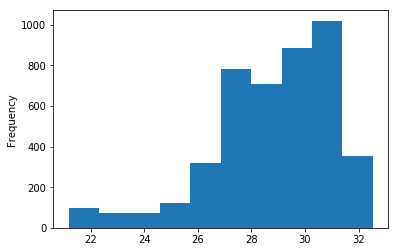

In [10]:
no_geo_data_df2.cooling_design_temperature.plot.hist()

In [9]:
no_geo_data_df2.columns

Index(['air_temperature', 'atmospheric_pressure', 'cooling_degree_days',
       'cooling_design_temperature', 'county', 'daily_solar_radiation',
       'earth_temperature', 'earth_temperature_amplitude', 'elevation', 'fips',
       'frost_days', 'heating_degree_days', 'heating_design_temperature',
       'lat', 'lon', 'relative_humidity', 'state', 'wind_speed'],
      dtype='object')

In [11]:
geo_cols = ['air_temperature', 'atmospheric_pressure', 'cooling_degree_days',
       'cooling_design_temperature', 'county', 'daily_solar_radiation',
       'earth_temperature', 'earth_temperature_amplitude', 'elevation',
       'frost_days', 'heating_degree_days', 'heating_design_temperature',
       'lat', 'lon', 'relative_humidity', 'state', 'wind_speed']

In [36]:
for fips_cde in no_geo_data_df2.fips:
    df_all.loc[df_all.fips == fips_cde, geo_cols] = no_geo_data_df2.loc[no_geo_data_df2.fips == fips_cde, geo_cols].values

In [71]:
df = df_all.loc[:, ~(df_all.columns).isin(['voting_2012_dem_percentage', 'voting_2012_gop_percentage'])]

KeyError: MemoryError()

In [43]:
df_nans2 = df[pd.isnull(df).any(axis=1)]
nans2 = df_nans2.isna().sum()
nans2.sort_values(ascending = False)

housing_unit_median_gross_rent             1976
housing_unit_median_value                  1894
earth_temperature                          1359
lon                                        1359
cooling_degree_days                        1359
heating_degree_days                        1359
wind_speed                                 1359
atmospheric_pressure                       1359
daily_solar_radiation                      1359
relative_humidity                          1359
air_temperature                            1359
frost_days                                 1359
earth_temperature_amplitude                1359
cooling_design_temperature                 1359
heating_design_temperature                 1359
elevation                                  1359
lat                                        1359
mortgage_with_rate                         1136
dropout_16_19_inschool_rate                1061
median_household_income                     957
average_household_income                

In [44]:
grps = df_nans2.groupby('state')

for grp in grps:
    print(grp[0], len(grp[1]), 100*len(grp[1])/len(df_all[df_all.state == grp[0]]) )

al 31 2.6248941574936495
ar 70 10.204081632653061
az 106 6.946264744429882
ca 331 4.108738828202582
co 70 5.604483586869495
ct 44 5.282112845138055
dc 14 7.82122905027933
de 14 6.422018348623853
fl 261 6.148409893992933
ga 70 3.5551041137633317
ia 148 17.939393939393938
id 5 1.6778523489932886
il 114 3.6503362151777137
in 33 2.1839841164791527
ks 103 13.376623376623376
ky 165 14.798206278026905
la 171 14.895470383275262
ma 152 10.284167794316645
md 142 10.099573257467995
me 15 4.189944134078212
mi 231 8.211873444720938
mn 142 10.612855007473842
mo 103 7.394113424264178
ms 44 6.626506024096385
mt 6 2.2140221402214024
nc 122 5.5580865603644645
nd 24 11.707317073170731
ne 57 10.714285714285714
nh 8 2.711864406779661
nj 235 11.691542288557214
nm 15 3.006012024048096
nv 66 9.606986899563319
ny 444 9.028060187067913
oh 90 3.048780487804878
ok 56 5.353728489483748
or 38 4.556354916067146
pa 166 5.158483530142946
ri 10 4.098360655737705
sc 72 6.527651858567543
sd 20 9.00900900900901
tn 63 4.20

In [60]:
df = df.dropna()

In [68]:
# df.to_csv('cleaned_solar_tract.csv')

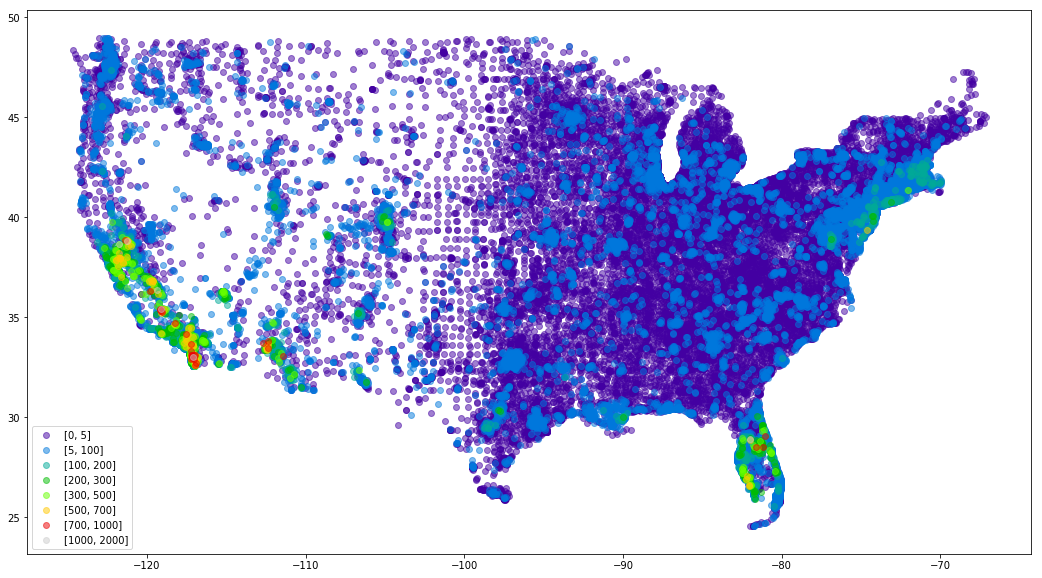

In [61]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,5],[5,100], [100, 200],[200,300],[300, 500], [500, 700], [700, 1000], [1000, 2000] ]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df[target]>=ct[0]) &(df[target]<ct[1])].lon, df[(df[target]>=ct[0]) &(df[target]<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [39]:
# Create some variables
df['income_per_area_residential'] = df['average_household_income']*df['household_count'].div(df.land_area)
df['household_density'] = df['household_count'].div(df.land_area)
df['education_higher_ed'] = (df['education_bachelor'] + df['education_doctoral'] + df['education_master'] + df['education_professional_school'])
df['house_val_rel_to_med_income'] = df['housing_unit_median_value'].div(df.median_household_income)

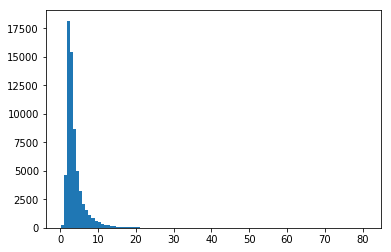

In [40]:
n, bins, patches = plt.hist(df.house_val_rel_to_med_income, 100)

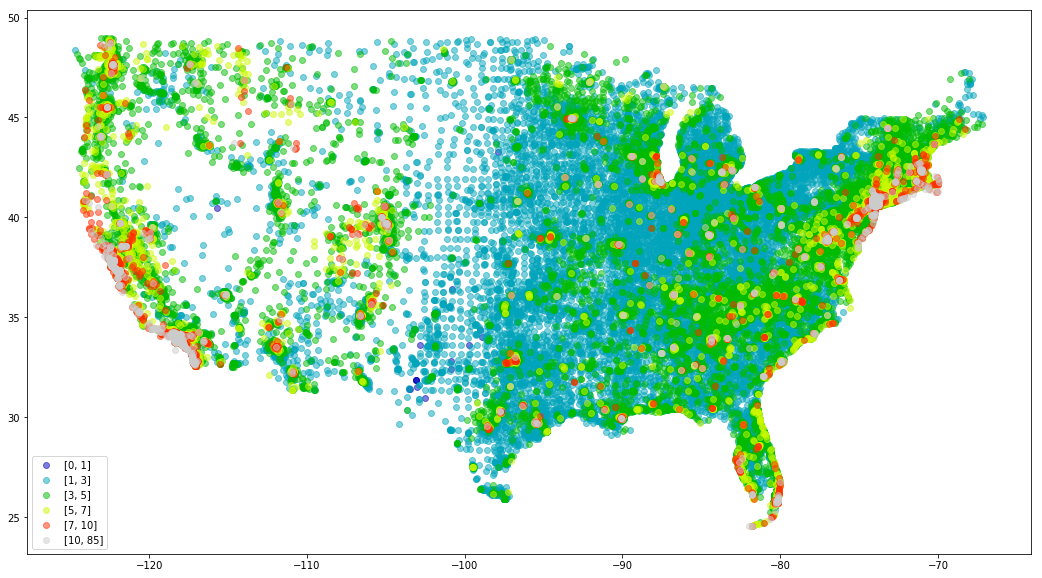

In [41]:
# 4.) Analyze target variable: map, ordered scatter plot
target = 'solar_system_count_residential'

cmap = plt.cm.get_cmap('nipy_spectral')
intervals = [[0,1],[1,3], [3, 5],[5,7],[7, 10], [10, 85]]

fig, ax = plt.subplots(figsize = [18,10])
for ct_ind, ct in enumerate(intervals):
    rgba = cmap((ct_ind +1)*1/len(intervals) )
    plt.scatter(df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lon, df[(df['house_val_rel_to_med_income']>=ct[0]) &(df['house_val_rel_to_med_income']<ct[1])].lat,c = rgba, alpha = .5, label = ct)

plt.legend()
# plt.gca().set_aspect('equal', adjustable='box')

In [42]:
print('Number of residential solar systems identified by image analysis:', sum(df[target]))
print('Number of census tracts without any identified solar systems:', len(df[df[target]>0]))
print('Greatest number of solar systems identified in a single tract:', max(df[target]), '(',df[df[target] == max(df[target])]['county'],',',df[df[target] == max(df[target])]['state'] ,')')
print('Percentage of households with solar systems:', 100*sum(df[target])/sum(df['household_count']))

Number of residential solar systems identified by image analysis: 1188157.0
Number of census tracts without any identified solar systems: 47592
Greatest number of solar systems identified in a single tract: 1404.0 ( 8573    San Diego County
Name: county, dtype: object , 8573    ca
Name: state, dtype: object )
Percentage of households with solar systems: 1.1395038764674017


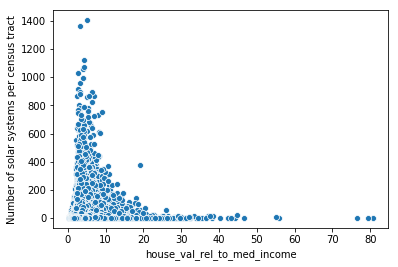

In [169]:
ax = sns.scatterplot(x = df.house_val_rel_to_med_income, y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

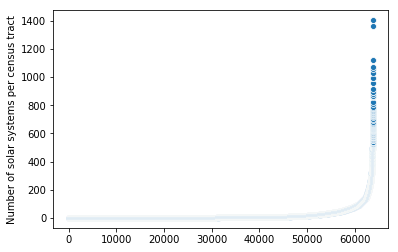

In [73]:
ax = sns.scatterplot(x = [ik for ik in range(len(df))], y = df[target].sort_values())
ax.set_ylabel('Number of solar systems per census tract')

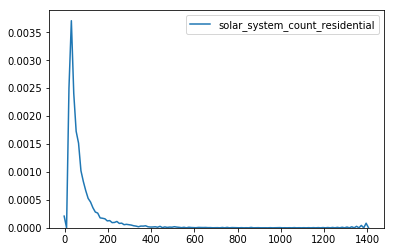

In [76]:
sns.kdeplot(df[target])

In [62]:
# 1.) pull out columns that contain strings, solar variables (except target), nonresidential variables

misc = ['Unnamed: 0','fips', 'county', 'state']
solar = ['total_panel_area',  'total_panel_area_residential', 'total_panel_area_nonresidential',  
                   'solar_panel_area_divided_by_area', 'solar_panel_area_per_capita',
                'tile_count','tile_count_residential', 'tile_count_nonresidential','number_of_solar_system_per_household', 
                   'solar_system_count','solar_system_count_nonresidential']
non_residential = ['electricity_price_transportation','incentive_count_nonresidential',
                   'electricity_consume_commercial','electricity_price_overall', 'electricity_consume_industrial', 
                   'electricity_consume_total','electricity_price_industrial','electricity_price_commercial']

df = df.loc[:, ~(df.columns).isin(misc + solar + non_residential)]


In [63]:
df.columns

Index(['average_household_income', 'education_bachelor', 'education_college',
       'education_doctoral', 'education_high_school_graduate',
       'education_less_than_high_school', 'education_master',
       'education_population', 'education_professional_school', 'employed',
       ...
       'incentive_count_residential', 'incentive_residential_state_level',
       'incentive_nonresidential_state_level', 'net_metering', 'feedin_tariff',
       'cooperate_tax', 'property_tax', 'sales_tax', 'rebate',
       'avg_electricity_retail_rate'],
      dtype='object', length=144)

In [ ]:
# Analyze distributions of key variables

In [ ]:
# .) Try to characterize relationships between logically related variables 

In [64]:
X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [65]:
variances = X_train.var()
var_df = pd.DataFrame({'cols': X_train.columns, 'variances': variances})
var_df.sort_values('variances', ascending=False)

,cols,variances
housing_unit_median_value,housing_unit_median_value,3.767905e+10
average_household_income,average_household_income,1.331223e+09
median_household_income,median_household_income,7.818584e+08
per_capita_income,per_capita_income,2.114035e+08
population_density,population_density,1.264433e+08
population,population,4.319650e+06
race_white,race_white,3.557860e+06
education_population,education_population,1.840923e+06
heating_degree_days,heating_degree_days,1.484434e+06
employed,employed,1.102073e+06


In [150]:
small_var = []
for var_ind, var in enumerate(variances):
    if var<10:
        small_var.append(variances.index[var_ind])


In [110]:
# 2.) Next, scale data

In [66]:
def split_scale_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    sclr = StandardScaler()
    sclr.fit(X_train[X_train.columns])

    X_train_scaled = pd.DataFrame(sclr.transform(X_train[X_train.columns]), columns = X_train.columns)
    X_test_scaled = pd.DataFrame(sclr.transform(X_test[X_test.columns]), columns = X_test.columns)

    y_train_scaled = X_train_scaled[target]
    X_train_scaled = X_train_scaled.loc[:, ~(X_train_scaled.columns).isin([target])]

    y_test_scaled = X_test_scaled[target]
    X_test_scaled = X_test_scaled.loc[:, ~(X_test_scaled.columns).isin([target])]
    
    return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled

In [67]:
# 3.) Run PCA and look at which features contribute most variance

X = df#.loc[:, ~(df.columns).isin([target])]
y = df[target]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = split_scale_data(X, y)

pca = PCA().fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

MemoryError: 

In [46]:
pca = PCA(n_components=120)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=120, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [20]:
labels = ['PC-'+str(ik) for ik in range(100)]
pca_components = pd.DataFrame(pca.components_,columns=X_train_scaled.columns,index = labels)

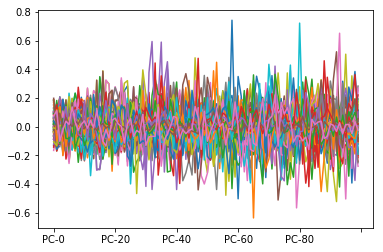

In [177]:
for col in pca_components.columns:
    pca_components[col].plot()

In [96]:
edu_omit = ['education_bachelor','education_college','education_doctoral','education_high_school_graduate','education_less_than_high_school','education_master','education_professional_school']
race_omit = ['race_asian','race_black_africa','race_indian_alaska','race_islander','race_other','race_two_more','race_white', 'race_indian_alaska_rate','race_two_more_rate']
heat_fuel_omit = ['heating_fuel_coal_coke','heating_fuel_electricity','heating_fuel_fuel_oil_kerosene','heating_fuel_gas','heating_fuel_housing_unit_count',
'heating_fuel_none','heating_fuel_other','heating_fuel_solar', 'heating_fuel_solar_rate']


edu_rate_omit = ['education_bachelor_rate','education_college_rate','education_doctoral_rate','education_high_school_graduate_rate','education_less_than_high_school_rate','education_master_rate','education_professional_school_rate']
race_rate_omit = ['race_asian_rate','race_black_africa_rate','race_indian_alaska_rate','race_islander_rate','race_other_rate','race_two_more_rate','race_white_rate','race_indian_alaska','race_two_more']
heat_fuel_rate_omit = ['heating_fuel_coal_coke_rate','heating_fuel_electricity_rate','heating_fuel_fuel_oil_kerosene_rate','heating_fuel_gas_rate','heating_fuel_housing_unit_count_rate',
'heating_fuel_none_rate','heating_fuel_other_rate','heating_fuel_solar_rate', 'heating_fuel_solar']



In [ ]:
# 5.) Consider model options: Linear Regression, Random Forest Regression, SVM-R, Gradient Boosting Regression

In [47]:
from sklearn import linear_model

lin_reg = linear_model.LinearRegression()
lin_reg.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lin_reg = lin_reg.predict(pca.transform(X_test_scaled))
print('lin_reg score:', lin_reg.score(pca.transform(X_test_scaled), y_test_scaled))

lasso = linear_model.Lasso()
lasso.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_lasso_reg = lasso.predict(pca.transform(X_test_scaled))
print('lasso score:', lasso.score(pca.transform(X_test_scaled), y_test_scaled))

ridge = linear_model.Ridge()
ridge.fit(pca.transform(X_train_scaled), y_train_scaled)
pred_ridge_reg = ridge.predict(pca.transform(X_test_scaled))
print('ridge score:', ridge.score(pca.transform(X_test_scaled), y_test_scaled))

lin_reg score: 0.456880545794
lasso score: 0.0497594327352
ridge score: 0.456885765306


In [99]:
from sklearn.svm import SVR

params = {'kernel' :'rbf'}
svr = SVR(**params)
svr.fit(pca.transform(X_train_scaled), y_train_scaled)

preds = svr.predict(pca.transform(X_test_scaled))
svr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.74098671220007795

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [22]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.60483639010279622

In [101]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(pca.transform(X_train_scaled), y_train_scaled)
preds_clf = clf.predict(pca.transform(X_test_scaled))
clf.score(pca.transform(X_test_scaled), y_test_scaled)

0.76257850059570331

In [154]:
X2 = df.loc[:, ~(df.columns).isin([target])]
y2 = df[target]

X_train, X_test, y_train, y_test= train_test_split(X2, y2)

clf2 = ensemble.GradientBoostingRegressor(**params)
clf2.fit(X_train, y_train)
preds_clf2 = clf2.predict(X_test)
clf2.score(X_test, y_test)


0.73025680430040729

In [156]:
cross_val_score(clf2, X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


array([ 0.72585088,  0.73445397,  0.75743734])

In [103]:
rfr = ensemble.RandomForestRegressor(max_depth=6, random_state=0, n_estimators=100)
rfr.fit(pca.transform(X_train_scaled), y_train_scaled)
print(cross_val_score(rfr, pca.transform(X_train_scaled), y_train_scaled))

preds_rfr = rfr.predict(pca.transform(X_test_scaled))
rfr.score(pca.transform(X_test_scaled), y_test_scaled)

/usr/local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[ 0.56471359  0.58508041  0.56849524]


0.5962793518956

In [ ]:
# 6.) Optimize models with GridSearchCV

In [50]:
params = {'loss': ['ls', 'lad', 'huber'], 
         'learning_rate': [.01, .1] ,
         'subsample': [.6, 1],
         'criterion': ['friedman_mse', 'mae'],
         'max_depth': [2,3,6],
         'n_estimators':[100, 400]
         }

import time
start = time.time()
gbr = ensemble.GradientBoostingRegressor(**params)
clf = GridSearchCV(gbr, params, cv = 5, n_jobs= -1)
clf.fit(pca.transform(X_train_scaled), y_train_scaled)
clf.score(pca.transform(X_test_scaled), y_test_scaled)
end = time.time()
total_time = end-start
print('total time:', total_time)

KeyboardInterrupt: 

In [ ]:
# 7.) Consider different metrics 

In [ ]:
# 8.) Present final model with discussion of error